In [17]:

import os
import tensorflow as tf
import torch
from tensorflow.python.summary.summary_iterator import summary_iterator
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
def parse_eventfiles(summary_dir, tag='test/accuracy'): 
    step_acc_list = []
    for filename in os.listdir(summary_dir):
        sum_iter =  summary_iterator(os.path.join(summary_dir,filename))
        for summ in sum_iter:
            if summ.HasField('summary'):
                if summ.summary.value[0].tag == tag:
                    step_acc_list.append((summ.step,(tf.make_ndarray(summ.summary.value[0].tensor))))

                    
    return sorted(step_acc_list, key=lambda x: x[0])

In [3]:
cd /projectnb/ivc-ml/piotrt/gradmax/growneuron/jupyter_analysis


/projectnb/ivc-ml/piotrt/gradmax/growneuron/jupyter_analysis


In [4]:
steps_gradmax, loss_gradmax = list(zip(*parse_eventfiles('../outputs/cifar/24570_single/gm_gradmax_cifar/summaries/', tag='train/negative_log_likelihood')))
steps_firefly, loss_firefly = list(zip(*parse_eventfiles('../outputs/cifar/24570_single_2/gm_firefly_cifar/summaries/', tag='train/negative_log_likelihood')))
steps_random, loss_random = list(zip(*parse_eventfiles('../outputs/cifar/24570_single_3/gm_random_cifar/summaries/', tag='train/negative_log_likelihood')))

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [5]:
cd /projectnb/ivc-ml/chaupham/anytime/param_share/incremental_training/

/projectnb/ivc-ml/chaupham/anytime/param_share/incremental_training


In [6]:
ls snapshots/

A/
baseline-c100-large-amp-ffcv/
baseline-c100-large-amp-ffcv-2/
baseline-c100-large-noamp-ffcv/
baseline-c100-small-amp-ffcv/
baseline-c100-small-noamp-ffcv/
baseline-imagenet-big/
baseline-imagenet-big-1/
baseline-imagenet-fullensemble/
baseline-imagenet-fullensemble-1/
baseline-imagenet-gradmax-halfseed/
baseline-imagenet-gradmax-halfseed-nogminit/
baseline-imagenet-randinit/
baseline-imagenet-randinit-1/
baseline-imagenet-small/
baselinestd-nogrow-ens2of-28-2/
cifar100_full_ens_29bins/
cifar100_full_ens_29bins_2students/
cifar100_ours_ens_bank_size_8_v2/
cifar100_ours_ens_bank_size_8_v2_63epochs/
cifar100_ours_ens_bank_size_8_v2_grow_10_seed_45044/
cifar100_ours_ens_bank_size_8_v2_grow_10_seed_65079/
cifar100_ours_ens_bank_size_8_v2_grow_13_seed_45044/
cifar100_ours_ens_bank_size_8_v2_grow_13_seed_65079/
cifar100_ours_ens_bank_size_8_v2_grow_13_seed_92756/
cifar100_ours_ens_bank_size_8_v2_grow_15_seed_45044/
cifar100_ours_ens_bank_size_8_v2_grow_15_seed_65079/
cifar100_ours_ens_ban

In [104]:
checkpoint = torch.load('/projectnb/ivc-ml/chaupham/anytime/param_share/incremental_training/snapshots/cifar100_ours_v2_grow_63/checkpoint.pth.tar', map_location=torch.device('cpu'))
recorder = checkpoint['recorder']
checkpoint_ours_ens = torch.load('/projectnb/ivc-ml/chaupham/anytime/param_share/incremental_training/snapshots/cifar100_ours_ens_bank_size_8_v2_grow_63/checkpoint.pth.tar', map_location=torch.device('cpu'))
recorder_ours_ens = checkpoint_ours_ens['recorder']
checkpoint_ours_ens_cc = torch.load('/projectnb/ivc-ml/chaupham/anytime/param_share/incremental_training/snapshots/cifar100_ours_ens_coeffs_copy/checkpoint.pth.tar', map_location=torch.device('cpu'))
recorder_ours_ens_cc = checkpoint_ours_ens_cc['recorder']


In [105]:
cd /projectnb/ivc-ml/piotrt/anytime_bug_repro/anytime/param_share/incremental_training/

/projectnb/ivc-ml/piotrt/anytime_bug_repro/anytime/param_share/incremental_training


In [106]:
ls snapshots

A/
__cifar100_full_ens_28bins/
__cifar100_ours_slim_depth_28bins/
__cifar100_ours_slim_mix_28bins/
__cifar100_ours_slim_mix_29bins/
baseline-c100-large-amp-ffcv/
baseline-c100-large-amp-ffcv-2/
baseline-c100-large-noamp-ffcv/
baseline-c100-small-amp-ffcv/
baseline-c100-small-noamp-ffcv/
baseline-imagenet-big/
baseline-imagenet-big-1/
baseline-imagenet-fullensemble/
baseline-imagenet-fullensemble-1/
baseline-imagenet-gradmax-halfseed/
baseline-imagenet-gradmax-halfseed-nogminit/
baseline-imagenet-randinit/
baseline-imagenet-randinit-1/
baseline-imagenet-small/
baselinestd-nogrow-ens2of-28-2/
cifar100_full_ens_29bins/
cifar100_full_ens_29bins_main2/
cifar100_ours_ens_bank_size_3/
cifar100_ours_ens_bank_size_4/
cifar100_ours_ens_bank_size_6/
cifar100_ours_ens_bank_size_8/
cifar100_ours_ens_bank_size_8_v2_63epochs_v2/
cifar100_ours_ens_bank_size_8_v2_63epochs_v2_horizontal_copy/
cifar100_ours_ens_bank_size_8_v2_63epochs_v2_horizontal_copy2/
cifar100_ours_ens_bank_size_8_v2_63epochs_v2_hori

In [107]:
checkpoint_ours_ens_alpha = torch.load('/projectnb/ivc-ml/piotrt/anytime_bug_repro/anytime/param_share/incremental_training/snapshots/cifar100_ours_ens_bank_size_8_v2_63epochs_v2_random_alpha//checkpoint.pth.tar', map_location=torch.device('cpu'))
recorder_ours_ens_alpha = checkpoint_ours_ens_alpha['recorder']

In [108]:
recorder.epoch_accuracy

array([[14.218, 16.9  ],
       [29.476, 25.89 ],
       [38.646, 34.39 ],
       [45.282, 31.09 ],
       [49.73 , 43.96 ],
       [53.514, 45.61 ],
       [56.222, 40.8  ],
       [58.424, 47.9  ],
       [59.912, 51.3  ],
       [61.302, 53.91 ],
       [62.634, 50.8  ],
       [64.036, 54.96 ],
       [65.148, 53.44 ],
       [65.678, 55.09 ],
       [66.556, 56.73 ],
       [67.242, 49.96 ],
       [67.802, 58.52 ],
       [68.506, 52.42 ],
       [68.92 , 55.98 ],
       [69.718, 59.82 ],
       [70.17 , 56.83 ],
       [70.4  , 56.02 ],
       [70.926, 53.6  ],
       [71.588, 56.87 ],
       [71.846, 57.07 ],
       [72.148, 59.44 ],
       [72.764, 58.77 ],
       [72.884, 61.56 ],
       [74.   , 59.45 ],
       [74.188, 62.33 ],
       [74.246, 60.87 ],
       [74.98 , 61.33 ],
       [75.174, 63.94 ],
       [75.624, 62.32 ],
       [76.486, 63.35 ],
       [76.88 , 61.07 ],
       [77.078, 62.02 ],
       [77.64 , 63.36 ],
       [78.118, 65.3  ],
       [78.558, 60.76 ],


In [109]:
#train_loss = recorder.epoch_losses[:,0]
#train_loss_ours_ens = recorder_ours_ens.epoch_losses[:,0]
#train_loss_ours_ens_cc = recorder_ours_ens_cc.epoch_losses[:,0]
#train_loss_ours_ens_alpha = recorder_ours_ens_alpha.epoch_losses[:,0]

train_loss_ours_adj = recorder.epoch_accuracy[:,1]
train_loss_ours_ens_adj = recorder_ours_ens.epoch_accuracy[:,1]
train_loss_ours_ens_cc_adj = recorder_ours_ens_cc.epoch_accuracy[:,1]
train_loss_ours_ens_alpha_adj = recorder_ours_ens_alpha.epoch_accuracy[:,1]

In [110]:
len(train_loss_ours_ens_cc_adj) 

100

In [111]:
#train_loss_ours_adj = [l if idx < 62 else l for idx,l in enumerate(train_loss) ]

In [112]:
#train_loss_ours_ens_adj = [l/2. if idx < 62 else l for idx,l in enumerate(train_loss_ours_ens) ]
#train_loss_ours_ens_cc_adj = [l/2. if idx < 62 else l for idx,l in enumerate(train_loss_ours_ens_cc) ]
#train_loss_ours_ens_alpha_adj = [l/2. if idx < 62 else l for idx,l in enumerate(train_loss_ours_ens_alpha) ]

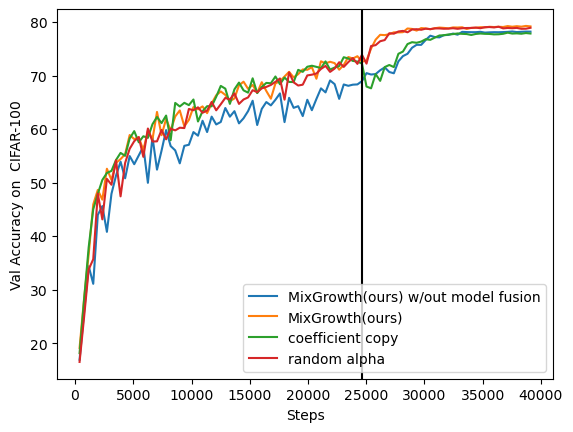

In [113]:
#plt.plot(steps_random, loss_random, label='random')
#plt.plot(steps_gradmax, loss_gradmax, label='gradmax')
#plt.plot(steps_firefly, loss_firefly, label='firefly')
plt.plot(np.array(range(1,101)) * 391, train_loss_ours_adj, label='MixGrowth(ours) w/out model fusion')
plt.plot(np.array(range(1,101)) * 391, train_loss_ours_ens_adj, label='MixGrowth(ours)')
plt.plot(np.array(range(1,101)) * 391, train_loss_ours_ens_cc_adj, label='coefficient copy')
plt.plot(np.array(range(1,101)) * 391, train_loss_ours_ens_alpha_adj, label='random alpha')
plt.axvline(391 * 63, color='black')
plt.xlabel('Steps')
plt.ylabel('Val Accuracy on  CIFAR-100')
plt.legend()
#plt.savefig('/projectnb/ivc-ml/piotrt/gradmax/growneuron/jupyter_analysis/Fig1.pdf')
plt.show()

In [114]:
loss_firefly[0]

array(4.91112, dtype=float32)

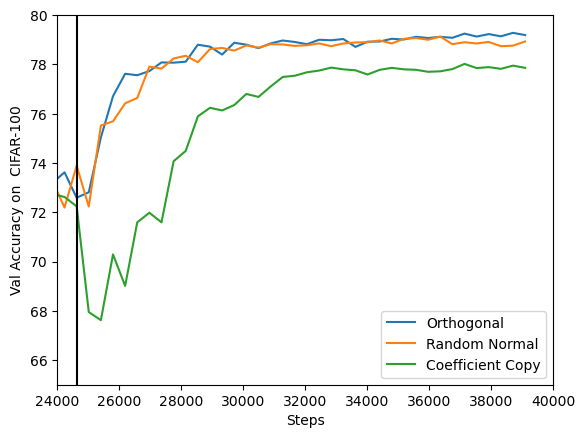

In [118]:
#plt.plot(steps_random, loss_random, label='random')
#plt.plot(steps_gradmax, loss_gradmax, label='gradmax')
#plt.plot(steps_firefly, loss_firefly, label='firefly')
plt.plot(np.array(range(1,101)) * 391, train_loss_ours_ens_adj, label='Orthogonal')
plt.plot(np.array(range(1,101)) * 391, train_loss_ours_ens_alpha_adj, label='Random Normal')
plt.plot(np.array(range(1,101)) * 391, train_loss_ours_ens_cc_adj, label='Coefficient Copy')
plt.axvline(391 * 63, color='black')
plt.xlabel('Steps')
plt.ylabel('Val Accuracy on  CIFAR-100')
plt.legend()
plt.xlim([24000, 40000])
plt.ylim([65,80])
plt.savefig('/projectnb/ivc-ml/piotrt/gradmax/growneuron/jupyter_analysis/val_curve.pdf')
plt.show()